In [42]:
from rdkit.Chem import AllChem as ch
from rdkit.Chem import Draw as d
from rdkit import DataStructs

from matplotlib.mlab import PCA
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import lipinski as lip

In [3]:
suppl = ch.SDMolSupplier('../data/drugbank.sdf')
mols = [x for x in suppl if x is not None]

In [7]:
data=[]
for mol in mols:
    data.append([mol.GetProp("DRUGBANK_ID"), lip.num_hydrogen_bond_acceptors(mol),
                 lip.num_hydrogen_bond_donors(mol), lip.MW(mol), lip.logP(mol), lip.TPSA(mol),
                 lip.num_rotatable_bonds(mol)])

In [8]:
data[0]

['DB00006',
 57,
 31,
 2180.316999999999,
 -8.116429999999927,
 901.5700000000003,
 66]

In [31]:
dataframe = pd.DataFrame(data,columns=["DRUGBANK_ID","HBA", "HBD", "MW", "logP", "TPSA", "RBs"])
dataframe.set_index("DRUGBANK_ID", inplace=True)
#dataframe

In [38]:
pca1 = PCA(dataframe,standardize=True)

In [40]:
pca1.Y

array([[-17.03988171,  -1.68147809,  -1.35472279,  -0.19282218,
          0.04609584,  -0.05548904],
       [ -8.54453107,  -0.49460757,  -0.10513902,   0.60426561,
         -0.14126358,   0.1553156 ],
       [ -6.73497633,   0.58493872,   0.54553025,   0.71131845,
         -0.34232777,  -0.02733786],
       ..., 
       [ -5.49805579,  -0.91558863,   1.58836586,   0.28098528,
          0.19734591,   0.04734048],
       [  0.07056291,  -0.10106396,  -1.12333729,  -0.85381279,
         -0.10205555,  -0.15185745],
       [  0.80544793,  -0.44619835,   0.45607489,  -0.14452606,
         -0.22849359,  -0.15503855]])

In [72]:
fig = plt.figure()
X = [x[0] for x in pca1.Y]
Y = [y[1] for y in pca1.Y]
plt.scatter(X,Y)
labels=zip([mol.GetProp("GENERIC_NAME") for mol in mols], X,Y)
for l in labels:
    if l[1]<-20:
        plt.annotate(l[0], (l[1], l[2]))
#plt.annotate("Ahoj",(-10,-10))

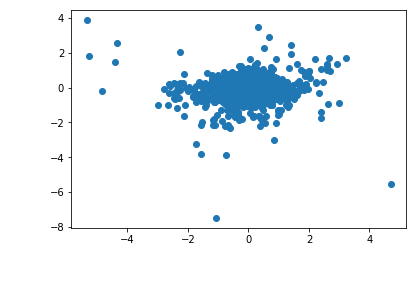

In [70]:
fig

In [68]:
pca1.s

array([ 32193.21471353,   7538.58757945,   1524.17366834,   1006.68928736,
          342.36547046,     48.96928085])